In [1]:
import pandas as pd
import numpy as np
from numpy import random,float,array
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df_1 = pd.read_csv('crime_data.csv')
df_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(df_1.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [6]:
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [5]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

In [6]:
z = linkage(df_norm, method="complete",metric="euclidean")

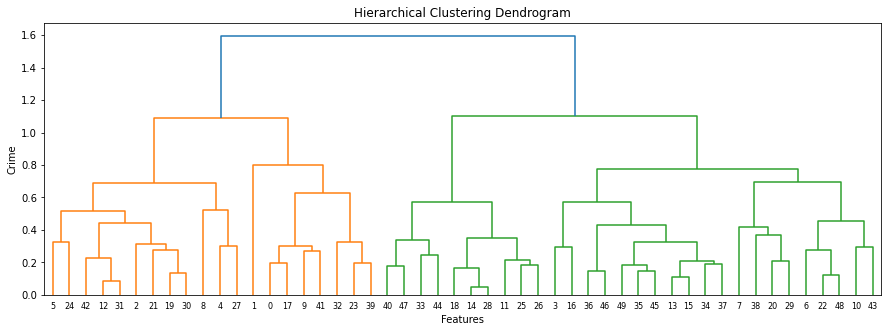

In [7]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

In [8]:
df_1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [9]:
k = list(range(2,15))

In [10]:
from scipy.spatial.distance import cdist 

In [11]:
TWSS = [] 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = []  
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],
                             kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

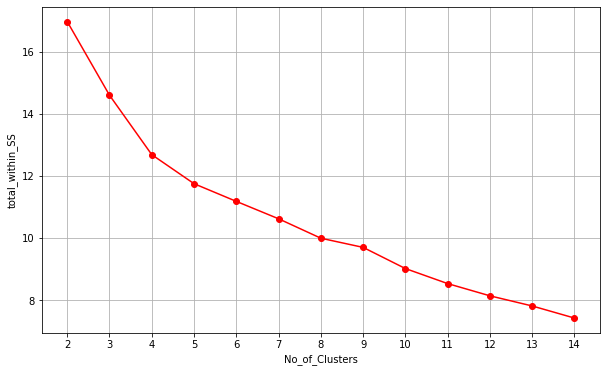

In [12]:
plt.figure(figsize=(10,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
plt.grid()
plt.show()

In [13]:
model=KMeans(n_clusters=4) 
model.fit(df_norm)

KMeans(n_clusters=4)

In [14]:
model.labels_

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 3, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [15]:
model.cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [16]:
X = df_1[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
df_1['Crime_clusters'] = clusters.labels_
df_1.head()
df_1.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [17]:
stats =df_1.sort_values("Murder", ascending=True)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Crime_clusters
33,North Dakota,0.8,45,44,7.3,3
28,New Hampshire,2.1,57,56,9.5,3
18,Maine,2.1,83,51,7.8,3
14,Iowa,2.2,56,57,11.3,3
44,Vermont,2.2,48,32,11.2,3
48,Wisconsin,2.6,53,66,10.8,3
11,Idaho,2.6,120,54,14.2,1
22,Minnesota,2.7,72,66,14.9,3
43,Utah,3.2,120,80,22.9,1
6,Connecticut,3.3,110,77,11.1,1


In [21]:
stats['Crime_clusters'].value_counts()

0    16
2    14
3    10
1    10
Name: Crime_clusters, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


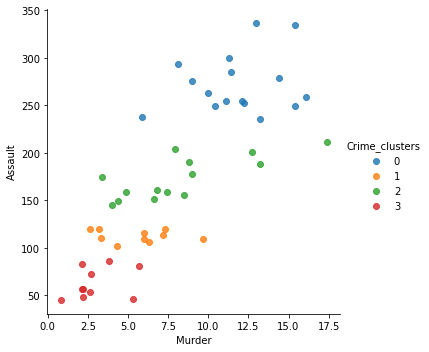

In [18]:
sns.lmplot( 'Murder','Assault',  data=df_1,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5 );

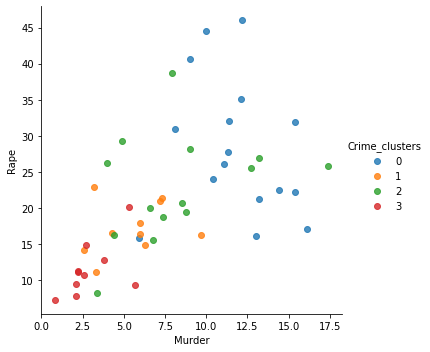

In [19]:
sns.lmplot( 'Murder','Rape',  data=df_1,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5 );

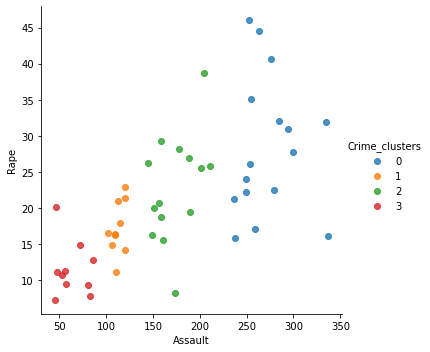

In [20]:
sns.lmplot( 'Assault','Rape',  data=df_1,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5 );